In [1]:
from model import param, params, logit, survey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
pd.set_option('display.max_rows', 500)

In [2]:
# load data
sago = survey()
sago.load()
attributes = sago.extract_attributes()
cs = sago.extract_choices()

                count         mean          std         min          25%  \
choice         9684.0     2.090768     0.832150    1.000000     1.000000   
svc_inf1       9684.0     6.584761     6.336579    0.000000     2.165000   
svc_inf2       9684.0     6.653507     6.329680    0.000000     2.165000   
svc_inf3       9684.0    11.158558     8.906957    0.000000     2.165000   
svc_avq1       9684.0    22.337573    22.594798    1.082500     6.495000   
svc_avq2       9684.0    22.524808    22.834558    1.082500     6.495000   
svc_avq3       9684.0    38.792601    32.205421    1.082500     7.577500   
svc_avd1       9684.0    29.626563    19.776153    2.165000    12.990000   
svc_avd2       9684.0    28.887905    19.785529    2.165000    11.907500   
svc_avd3       9684.0    44.996297    22.638309    2.165000    23.815000   
need_inf       9684.0    12.666055     7.650531    3.247500     8.660000   
need_avq       9684.0    42.774623    28.525789    8.660000    17.590625   
need_avd    

In [3]:
# initialize parameters
init_pars = params()
shifter_labels = ['constant','needs_level','prob_help_adl','help_adl_miss']
for s in ['liv_rpa','liv_ri','liv_chsld']:
     for h in shifter_labels:
          #if (s=='liv_rpa') & (h=='help_adl_miss'):
          #     p = param(s,h,value = 0,free=False)
          #elif (s=='liv_ri') & (h=='help_adl_miss'):
          #     p = param(s,h,value = 0,free=False)
          #else:
          p = param(s,h,value = 0)
          init_pars.add_param(p)

for s in ['sup_pri','sup_npf']:
     p = param(s,'constant',value = 0,free=True)
     init_pars.add_param(p)


for h in shifter_labels:
     if h=='constant':
          p = param('svc_inf','constant',value = -2)
     else :
          p = param('svc_inf',h,value = 0)
     init_pars.add_param(p)

for h in shifter_labels:
     if h=='constant':
          p = param('svc_avq','constant',value = -2)
     #elif h=='prob_help_adl':
     #     p = param('svc_avq',h,value = 0, free=False)
     else :
          p = param('svc_avq',h,value = 0)
     init_pars.add_param(p)

for h in shifter_labels:
     if h=='constant':
          p = param('svc_avd','constant',value = -2)
     else :
          p = param('svc_avd',h,value = 0)
     init_pars.add_param(p)

for h in shifter_labels:
     if h=='constant':
          p = param('cons',h,value = -2)
     #elif h=='help_adl_miss':
     #     p = param('cons',h,value = 0,free=False)
     else :
          p = param('cons',h,value = 0)
     init_pars.add_param(p)

for h in shifter_labels:
     if h=='constant':
          p = param('wait',h,value = -2)
     else :
          p = param('wait',h,value = 0,free=False)
     init_pars.add_param(p)

shifters = sago.extract_shifters(shifter_labels)     
n_attr = len(sago.attr_labels) 

In [4]:
init_pars.restart_from('ref')
for d in range(n_attr):
     for u in range(d,n_attr):
      if (d==u) & (u==0):
            p = param('uh','ln_sig_'+str(d)+str(u), value = np.log(0.2),free=True)
      elif (d==u) & (u==1):
            p = param('uh','ln_sig_'+str(d)+str(u), value = np.log(0.2))
      elif (d==u) & (u==2):
            p = param('uh','ln_sig_'+str(d)+str(u), value = np.log(0.2),free=True)
      elif (d==u) & (u==3):
            p = param('uh','ln_sig_'+str(d)+str(u), value = np.log(0.2),free=True)
      elif (d==u) & (u==4):
            p = param('uh','ln_sig_'+str(d)+str(u), value = np.log(0.2),free=True)
      elif (d==u) & (u==5):
            p = param('uh','ln_sig_'+str(d)+str(u), value = np.log(0.2),free=True)
      elif (d==u) & (u==6):
            p = param('uh','ln_sig_'+str(d)+str(u), value = np.log(0.2),free=True)
      elif (d==u) & (u==7):
            p = param('uh','ln_sig_'+str(d)+str(u), value = np.log(0.2),free=True)
      elif (d==u) & (u==8):
            p = param('uh','ln_sig_'+str(d)+str(u), value = np.log(0.2),free=True)
      elif (d==u) & (u==9):
            p = param('uh','ln_sig_'+str(d)+str(u), value = np.log(0.2),free=True)
      else:
            p = param('uh','rho_'+str(d)+str(u),value = 0,free=False)
      init_pars.add_param(p)
init_pars.restart_from('uh')


    Unnamed: 0      group          label     value    stderr     tvalue   free
0            0    liv_rpa       constant -0.937584  0.073217 -12.805574   True
1            1    liv_rpa    needs_level  0.835016  0.119832   6.968225   True
2            2    liv_rpa  prob_help_adl -0.217437  0.078727  -2.761916   True
3            3    liv_rpa  help_adl_miss -0.160810  0.067797  -2.371932   True
4            4     liv_ri       constant -0.285287  0.331063  -0.861729   True
5            5     liv_ri    needs_level  0.774413  0.415558   1.863549   True
6            6     liv_ri  prob_help_adl -0.238236  0.180668  -1.318636   True
7            7     liv_ri  help_adl_miss -0.214926  0.166776  -1.288711   True
8            8  liv_chsld       constant -1.504561  0.253005  -5.946754   True
9            9  liv_chsld    needs_level  2.180890  0.318378   6.849999   True
10          10  liv_chsld  prob_help_adl -0.451978  0.125414  -3.603883   True
11          11  liv_chsld  help_adl_miss -0.577467  

In [5]:
init_pars.table()

,group,label,value,stderr,tvalue,free
0,liv_rpa,constant,-1.039351,NaN,NaN,True
1,liv_rpa,needs_level,0.789034,NaN,NaN,True
2,liv_rpa,prob_help_adl,-0.205001,NaN,NaN,True
3,liv_rpa,help_adl_miss,-0.151678,NaN,NaN,True
4,liv_ri,constant,-0.235319,NaN,NaN,True
5,liv_ri,needs_level,0.766275,NaN,NaN,True
6,liv_ri,prob_help_adl,-0.298895,NaN,NaN,True
7,liv_ri,help_adl_miss,-0.402609,NaN,NaN,True
8,liv_chsld,constant,-3.106705,NaN,NaN,True
9,liv_chsld,needs_level,4.035045,NaN,NaN,True


def get_alphas_uh(etas, draws, L, c):
     n_d = draws.shape[0]
     n_obs = etas.shape[0]
     n_resp = draws.shape[1]
     n_attr = draws.shape[2]
     n_scns = 4
     alphas = np.zeros((n_d,n_obs,n_attr),dtype='float64')
     for d in range(n_d):
         ii = 0
         for i in range(n_resp):
            for k in range(n_attr):
                for s in range(n_scns):
                    alphas[d,ii+s,k] = etas[ii+s,k]
                for j in range(n_attr): 
                    for s in range(n_scns):
                        alphas[d,ii+s,k] += L[k,j] * draws[d,i,j]
                if c[k]!=0:
                    for s in range(n_scns):
                        alphas[d,ii+s,k] = c[k]*np.exp(alphas[d,ii+s,k])               
            ii += n_scns
     return alphas

def cprob_uh(us,cs):
    n_d = us.shape[0]
    n_obs = us.shape[1]
    cps = np.zeros((n_obs, n_d),dtype='float64')
    for i in range(n_obs):
        for d in range(n_d):
            den = np.sum(np.exp(us[d,i,:]))
            cps[i, d] = np.exp(us[d,i,cs[i]])/max(den,1e-12)
    return cps

def prob_uh(cps):
    n_d = cps.shape[1]
    n_obs = cps.shape[0]
    n_scn  = 4
    n_resp = int(n_obs / n_scn)
    ps = np.zeros(n_resp,dtype='float64')
    ii = 0
    for i in range(n_resp):
        for d in range(n_d):
            ps[i] += np.prod(cps[ii:ii+n_scn,d])
        ii += n_scn
        ps[i] = max(ps[i],1e-12)/n_d
    return ps

def calc_weights(cps):
    n_d = cps.shape[1]
    n_obs = cps.shape[0]
    n_scn  = 4
    n_resp = int(n_obs / n_scn)
    w = np.zeros((n_d,n_resp),dtype='float64')
    ii = 0
    for i in range(n_resp):
        for d in range(n_d):
            w[d,i] = np.prod(cps[ii:ii+n_scn,d])
        d_sum = np.sum(w[:,i])
        for d in range(n_d):
            w[d,i] /= d_sum
        ii += n_scn
    return w

def expand_weights(weights):
    n_d = weights.shape[0]
    n_obs = weights.shape[1]*4
    n_scn  = 4
    n_resp = weights.shape[1]
    w = np.zeros((n_d,n_obs),dtype='float64')
    ii = 0
    for i in range(n_resp):
        for d in range(n_d):
            w[d,ii:ii+n_scn] = weights[d,i]
        ii += n_scn
    return w

In [6]:
#setting the model
model = logit(with_uh = True)
model.set_params(init_pars)
for s in sago.attr_labels:  
    model.set_shifters(s,shifters)
model.set_choices(cs)

ctr = [0,0,0,0,0,-1,-1,-1,1,-1]
ctrs = dict(zip(sago.attr_labels,ctr))
model.set_attributes(attributes, sago.attr_labels, ctrs)
model.set_draws(n_d = 100)

In [7]:
thetas_hat = model.get_cond_distribution()

In [8]:
thetas_hat.shape

(9684, 10)

## Dentity function

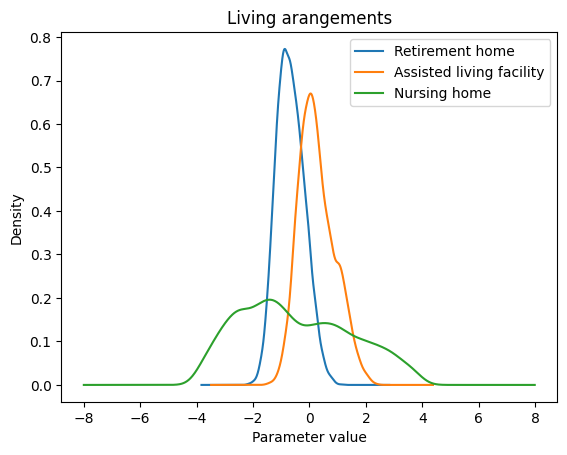

In [9]:
df_thetas_hat= pd.DataFrame(thetas_hat,index=range(thetas_hat.shape[0]),columns=sago.attr_labels)
plt.figure()

cond1 = (df_thetas_hat['liv_rpa']>=-4) & (df_thetas_hat['liv_rpa']<=4)
cond2 = (df_thetas_hat['liv_ri']>=-4) & (df_thetas_hat['liv_ri']<=4)
cond3 = (df_thetas_hat['liv_chsld']>=-4) & (df_thetas_hat['liv_chsld']<=4)

df_thetas_hat.loc[cond1,'liv_rpa'].plot.density(label='Retirement home')
df_thetas_hat.loc[cond2,'liv_ri'].plot.density(label='Assisted living facility') 
df_thetas_hat.loc[cond3,'liv_chsld'].plot.density(label='Nursing home')  

plt.title('Living arangements')
#plt.xticks(np.arange(-5, 6, 1))
plt.xlabel('Parameter value')

plt.legend()
plt.show()

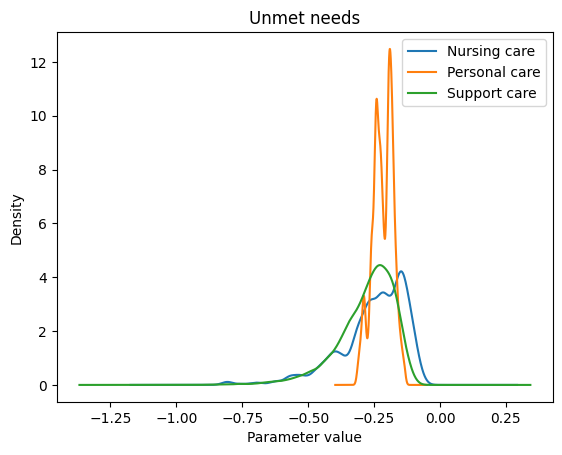

In [10]:
plt.figure()

cond1 = (df_thetas_hat['svc_inf']>=-1) & (df_thetas_hat['svc_inf']<=0)
cond2 = (df_thetas_hat['svc_avq']>=-1) & (df_thetas_hat['svc_avq']<=0)
cond3 = (df_thetas_hat['svc_avd']>=-1) & (df_thetas_hat['svc_avd']<=0)

df_thetas_hat.loc[cond1,'svc_inf'].plot.density(label='Nursing care')
df_thetas_hat.loc[cond2,'svc_avq'].plot.density(label='Personal care') 
df_thetas_hat.loc[cond3,'svc_avd'].plot.density(label='Support care')  

plt.title('Unmet needs')
#plt.xticks(np.arange(-5, 6, 1))
plt.xlabel('Parameter value')

plt.legend()
plt.show()

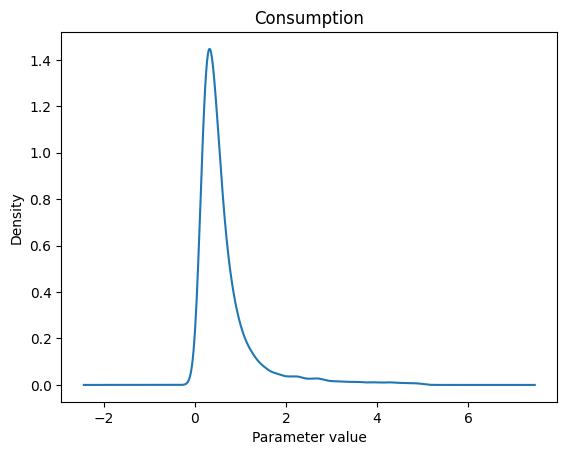

In [11]:
plt.figure()

cond1 = (df_thetas_hat['cons']>=0) & (df_thetas_hat['cons']<=5)
df_thetas_hat.loc[cond1,'cons'].plot.density()

plt.title('Consumption')
plt.xlabel('Parameter value')

plt.show()

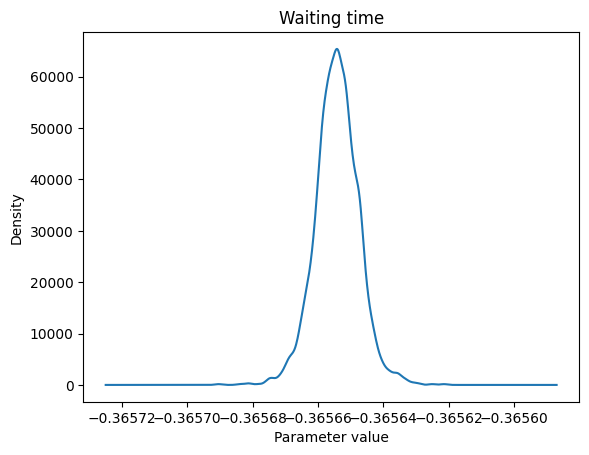

In [12]:
plt.figure()

cond1 = (df_thetas_hat['wait']>=-1.5) & (df_thetas_hat['wait']<=0)
df_thetas_hat.loc[cond1,'wait'].plot.density()

plt.title('Waiting time')
plt.xlabel('Parameter value')

plt.show()

## CDF

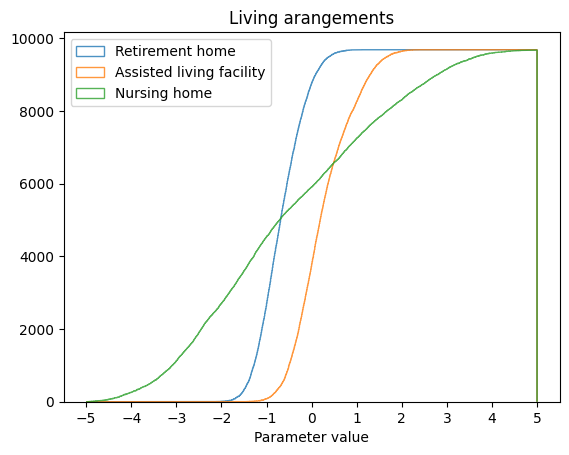

In [13]:
plt.figure()

plt.hist(df_thetas_hat.loc[:,'liv_rpa'],bins=1000, range=(-5,5), cumulative=True, label='Retirement home',
         histtype='step', alpha=0.8)
plt.hist(df_thetas_hat.loc[:,'liv_ri'],bins=1000, range=(-5,5), cumulative=True, label='Assisted living facility',
         histtype='step', alpha=0.8)
plt.hist(df_thetas_hat.loc[:,'liv_chsld'],bins=1000, range=(-5,5), cumulative=True, label='Nursing home',
         histtype='step', alpha=0.8)

plt.title('Living arangements')
plt.xticks(np.arange(-5, 6, 1))
plt.xlabel('Parameter value')

plt.legend()
plt.show()

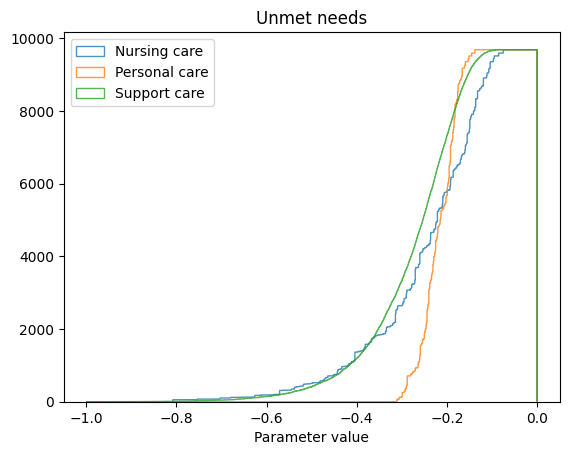

In [14]:
plt.figure()

plt.hist(df_thetas_hat.loc[:,'svc_inf'],bins=1000, range=(-1,0), cumulative=True, label='Nursing care',
         histtype='step', alpha=0.8)
plt.hist(df_thetas_hat.loc[:,'svc_avq'],bins=1000, range=(-1,0), cumulative=True, label='Personal care',
         histtype='step', alpha=0.8)
plt.hist(df_thetas_hat.loc[:,'svc_avd'],bins=1000, range=(-1,0), cumulative=True, label='Support care',
         histtype='step', alpha=0.8)

plt.title('Unmet needs')
#plt.xticks(np.arange(-1, 10, 0))
plt.xlabel('Parameter value')

plt.legend()
plt.show()

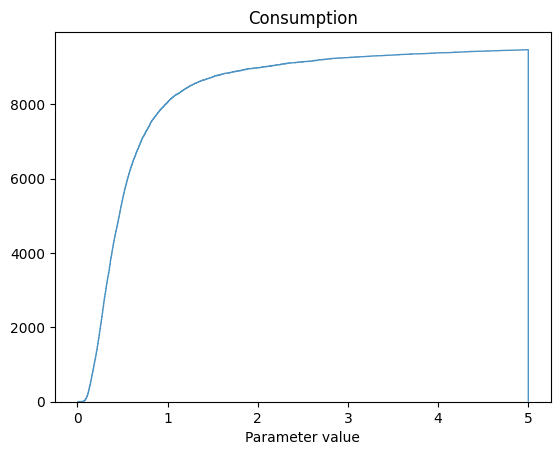

In [15]:
plt.figure()

plt.hist(df_thetas_hat.loc[:,'cons'],bins=1000, range=(0,5), cumulative=True,
         histtype='step', alpha=0.8)

plt.title('Consumption')
#plt.xticks(np.arange(-1, 10, 0))
plt.xlabel('Parameter value')

plt.show()

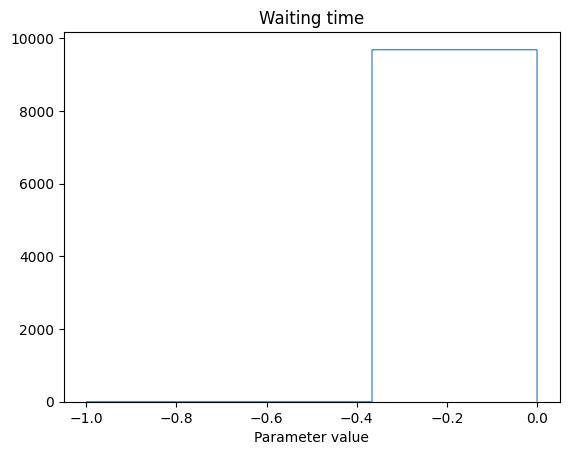

In [16]:
plt.figure()

plt.hist(df_thetas_hat.loc[:,'wait'],bins=1000, range=(-1,0), cumulative=True,
         histtype='step', alpha=0.8)

plt.title('Waiting time')
#plt.xticks(np.arange(-1, 10, 0))
plt.xlabel('Parameter value')

plt.show()